In [3]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pickle


### NOTES ON EVALUATION:

For each network type, for each centrality measure, for each random seed, we generate 10 random pairs from 
within the population - regardless of whether or not these agents we paired together during training. 

For each pair, we let them train over 1000 games generated from a withheld test set of images and log their
training trajectory. 

In this notebook, we average the training curves of each network-centrality combination over 3 random seeds.


In [4]:
base_dir = "../phillytools/ecai_eval/"

In [5]:
hash_dirs = [os.path.join(base_dir, hash_name) for hash_name in os.listdir(base_dir)]

In [6]:
network_paths = [os.path.join(hash_dir, os.listdir(hash_dir)[0]) for hash_dir in hash_dirs]

In [7]:
result_paths = [os.path.join(nw_path, os.listdir(nw_path)[0]) for nw_path in network_paths]

In [8]:
# store results in a dict so we can save later
results = {}

In [9]:
"""
key: string of form: $NETWORK_$CENTRALITY_$SEED
value: list of tuples of form (n_steps, accuracy)
"""
data = {}
for nw_path in network_paths:
    nw = os.path.basename(nw_path)
    pkl_path = os.path.join(nw_path, os.listdir(nw_path)[0])
    with open(pkl_path, "rb") as f:
        nw_data = pickle.load(f)["results"]
    data[nw] = nw_data

In [10]:
"""
average acc/train_step for each pair associated with a given seed
"""
def avg_logs(logs):
    r  = []
    for log in logs:
        rewards = [i[1] for i in log]
        r.append(rewards)
    avg = np.mean(np.array(r), 0)
    # avg = np.mean(avg.reshape(-1, 2), axis=1)
    return avg

In [11]:
"""
average `avg_logs` across seeds
"""
def avg_seeds(keys):
    avgs = []
    for key in keys:
        logs = data[key]
        avg = avg_logs(logs)
        avgs.append(avg)
    final = np.mean(np.array(avgs), 0)
    return final

In [12]:
steps = [i[0] for i in data["watts_pagerank_0"][0]]

In [14]:
# get watts_pagerank
name = "watts_pagerank"
keys = [str(name)+"_{:d}".format(i) for i in range(2)]
watts_pagerank = avg_seeds(keys)

results[name] = watts_pagerank

In [15]:
# get watts degree
name = "watts_degree"
keys = [str(name)+"_{:d}".format(i) for i in range(2)]
watts_degree = avg_seeds(keys)

results[name] = watts_degree

In [16]:
name = "watts_betweeness"
keys = [str(name)+"_{:d}".format(i) for i in range(2)]
watts_betweeness = avg_seeds(keys) 

results[name] = watts_betweeness

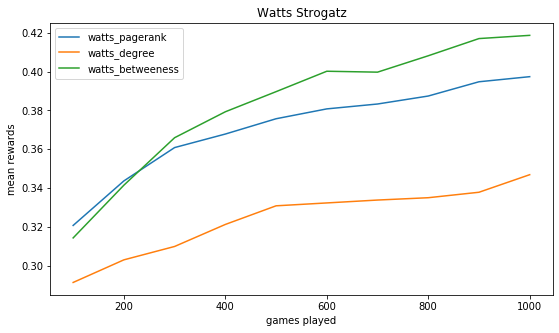

In [17]:
plt.figure(figsize=(9,5))
plt.plot(steps, watts_pagerank, label="watts_pagerank")
plt.plot(steps, watts_degree, label="watts_degree")
plt.plot(steps, watts_betweeness, label="watts_betweeness")
plt.xlabel("games played")
plt.ylabel("mean rewards")
plt.title("Watts Strogatz")
plt.legend()
plt.show()

In [18]:
name = "barabasi_pagerank"
keys = [str(name)+"_{:d}".format(i) for i in range(2)]
barabasi_pagerank = avg_seeds(keys)

results[name] = barabasi_pagerank

In [19]:
name = "barabasi_degree"
keys = [str(name)+"_{:d}".format(i) for i in range(2)]
barabasi_degree = avg_seeds(keys)

results[name] = barabasi_degree

In [20]:
name = "barabasi_betweeness"
keys = [str(name)+"_{:d}".format(i) for i in range(2)]
barabasi_betweeness = avg_seeds(keys)

results[name] = barabasi_betweeness

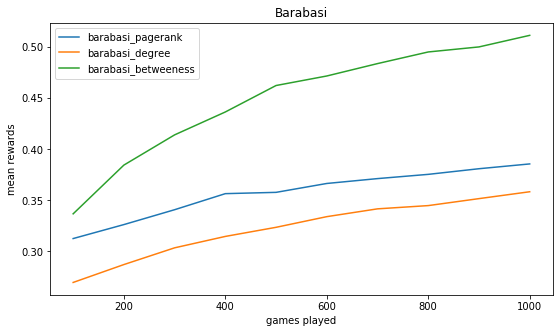

In [21]:
plt.figure(figsize=(9,5))
plt.plot(steps, barabasi_pagerank, label="barabasi_pagerank")
plt.plot(steps, barabasi_degree, label="barabasi_degree")
plt.plot(steps, barabasi_betweeness, label="barabasi_betweeness")
plt.xlabel("games played")
plt.ylabel("mean rewards")
plt.title("Barabasi")
plt.legend()
plt.show()

In [22]:
name = "erdos_pagerank"
keys = [str(name)+"_{:d}".format(i) for i in range(2)]
erdos_pagerank = avg_seeds(keys)

results[name] = erdos_pagerank

In [23]:
name = "erdos_degree"
keys = [str(name)+"_{:d}".format(i) for i in range(2)]
erdos_degree = avg_seeds(keys)

results[name] = erdos_degree

In [24]:
name = "erdos_betweeness"
keys = [str(name)+"_{:d}".format(i) for i in range(2)]
erdos_betweeness = avg_seeds(keys)

results[name] = erdos_betweeness

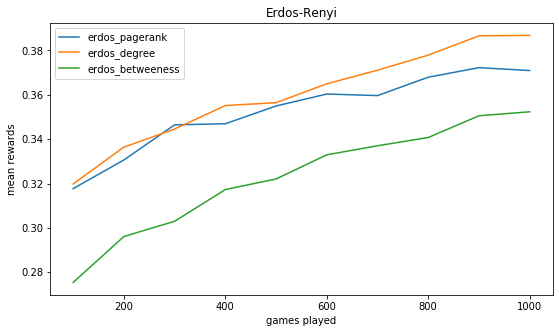

In [46]:
plt.figure(figsize=(9,5))
plt.plot(steps, erdos_pagerank, label="erdos_pagerank")
plt.plot(steps, erdos_degree, label="erdos_degree")
plt.plot(steps, erdos_betweeness, label="erdos_betweeness")
plt.xlabel("games played")
plt.ylabel("mean rewards")
plt.title("Erdos-Renyi")
plt.legend()
plt.show()

In [29]:
"""
pickle results: no need to run this cell
"""
with open("../processed_eval_results.pkl", "wb") as f:
    pickle.dump(results, f)